# HW#8 Fashion MNIST with 3-layer-MLP
> 2022094093 Kim Dohoon, Dept of Data Science

- Dense(Hidden) - Dropout - Dense(Output)
    - Nadam Optimizer (learning rate : 0.0005)
    - Sparse Categorical Cross Entropy (reduction : SUM_OVER_BATCH_SIZE)
    - Dropout 0.1
    - batch_size = 1000
 

In [46]:
# Modules
import tensorflow as tf
import numpy as np
from keras import layers
import numpy as np
import random as rn
from keras.models import Sequential
import matplotlib.pylab as plt
from keras.utils import np_utils

###### Do not modify ######
np.random.seed(1)
tf.random.set_seed(1)
rn.seed(1)
###########################

In [48]:
# Initial Setting

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(60000, -1).astype(np.float32)
test_images = test_images.reshape(10000, -1).astype(np.float32)
train_images, test_images = train_images/255.0, test_images/255.0
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

num_pixels = train_images.shape[1]  # 28 * 28 = 784

# To get best model, use Callback
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath='nondropout_model_best.hdf5',
    verbose = 1,
    save_best_only=True,
    monitor='val_accuracy')

In [52]:
# Dropout Model
model = Sequential()

model.add(layers.Dense(num_pixels*3, input_dim=num_pixels, activation='relu'))
#model_Dropout.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

# See how model was built
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2352)              1846320   
                                                                 
 dense_25 (Dense)            (None, 10)                23530     
                                                                 
Total params: 1,869,850
Trainable params: 1,869,850
Non-trainable params: 0
_________________________________________________________________


In [53]:
nadam = tf.keras.optimizers.Nadam(learning_rate=0.0005)
scce = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction = tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
)

model.compile(optimizer=nadam,
              loss=scce,
              metrics=['accuracy'])

dropout_history = model.fit(
        train_images, train_labels,
        epochs=200,
        batch_size=500,
        validation_data = (test_images, test_labels),
        callbacks=[checkpointer])

Epoch 1/200
115/120 [===========================>..] - ETA: 0s - loss: 0.6555 - accuracy: 0.7773
Epoch 1: val_accuracy did not improve from 0.90650
120/120 [==============================] - 1s 7ms/step - loss: 0.6476 - accuracy: 0.7796 - val_loss: 0.5061 - val_accuracy: 0.8151
Epoch 2/200
115/120 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.8483
Epoch 2: val_accuracy did not improve from 0.90650
120/120 [==============================] - 1s 5ms/step - loss: 0.4313 - accuracy: 0.8489 - val_loss: 0.4220 - val_accuracy: 0.8514
Epoch 3/200
114/120 [===========================>..] - ETA: 0s - loss: 0.3768 - accuracy: 0.8657
Epoch 3: val_accuracy did not improve from 0.90650
120/120 [==============================] - 1s 5ms/step - loss: 0.3769 - accuracy: 0.8659 - val_loss: 0.3910 - val_accuracy: 0.8617
Epoch 4/200
118/120 [============================>.] - ETA: 0s - loss: 0.3461 - accuracy: 0.8760
Epoch 4: val_accuracy did not improve from 0.90650
120/120 [======

313/313 - 1s - loss: 0.5831 - accuracy: 0.9082 - 711ms/epoch - 2ms/step
________________________________________________________________


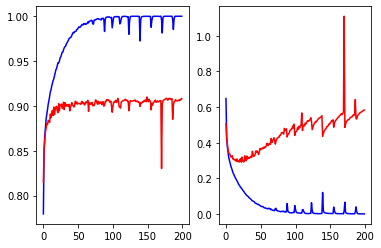

In [54]:
# Evaluate Model / Show Accuracy & Loss
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("________________________________________________________________")
plt.title("accuracy for the training data")
plt.subplot(1,2,1)
plt.plot(dropout_history.history["accuracy"], 'b')
plt.plot(dropout_history.history['val_accuracy'],'r')
plt.subplot(1,2,2)
plt.plot(dropout_history.history["loss"], 'b')
plt.plot(dropout_history.history['val_loss'],'r')

In [56]:
# Load best model
load_model = tf.keras.models.load_model('nondropout_model_best.hdf5')
load_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.9100


[0.5035098791122437, 0.9100000262260437]

In [57]:
load_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2352)              1846320   
                                                                 
 dense_25 (Dense)            (None, 10)                23530     
                                                                 
Total params: 1,869,850
Trainable params: 1,869,850
Non-trainable params: 0
_________________________________________________________________


In [58]:
from google.colab import files
files.download("nondropout_model_best.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>